# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [22]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import pandas as pd 
from sklearn.compose import make_column_selector, ColumnTransformer
from palmerpenguins import load_penguins
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

penguin = load_penguins().dropna()

penguin['gentoo'] = penguin['species'] == 'Gentoo'

X = penguin.drop(columns=["gentoo","species"])
y = penguin["gentoo"]

categorical = ["sex","island"]
numerical = X.select_dtypes(include=["int64","float64"]).columns


## preprocessing 

preprocessing = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ]
)

## pipeline

logisticPipe = Pipeline(steps = [
    ("preprocessing", preprocessing),
    ("logistic regression",LogisticRegression())
])

## fit model 

logisticPipe.fit(X,y)

accuracy = cross_val_score(logisticPipe, X, y, cv=5, scoring="accuracy").mean()
print(f"a: {accuracy:.2f}")





a: 1.00
a: 1.00


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

<positron-console-cell-2>:59: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


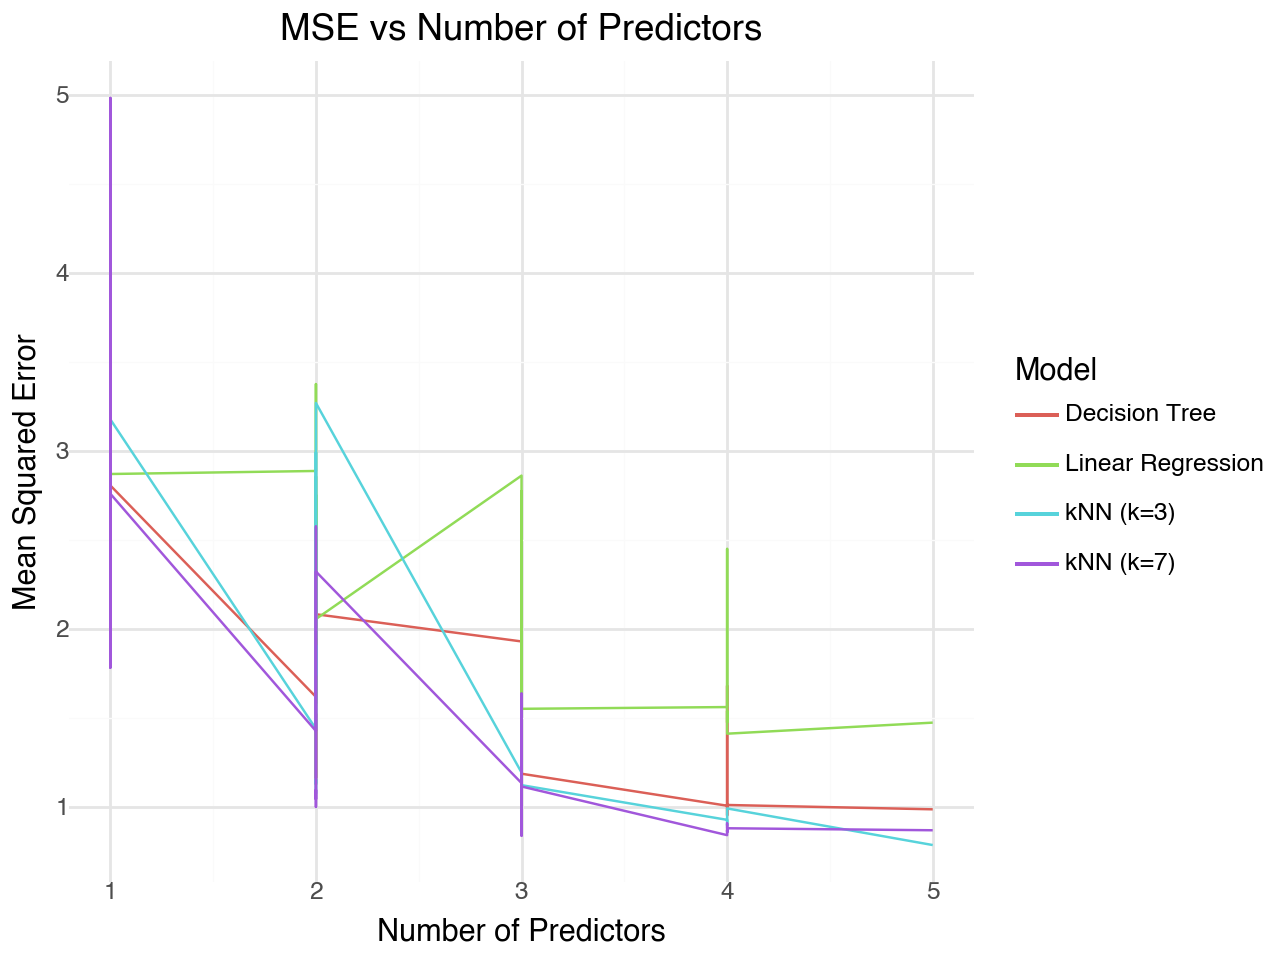


Best Model: Model         kNN (k=3)
Predictors            5
MSE            0.785778
Name: 121, dtype: object


Best Model: Model         kNN (k=3)
Predictors            5
MSE            0.785778
Name: 121, dtype: object


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


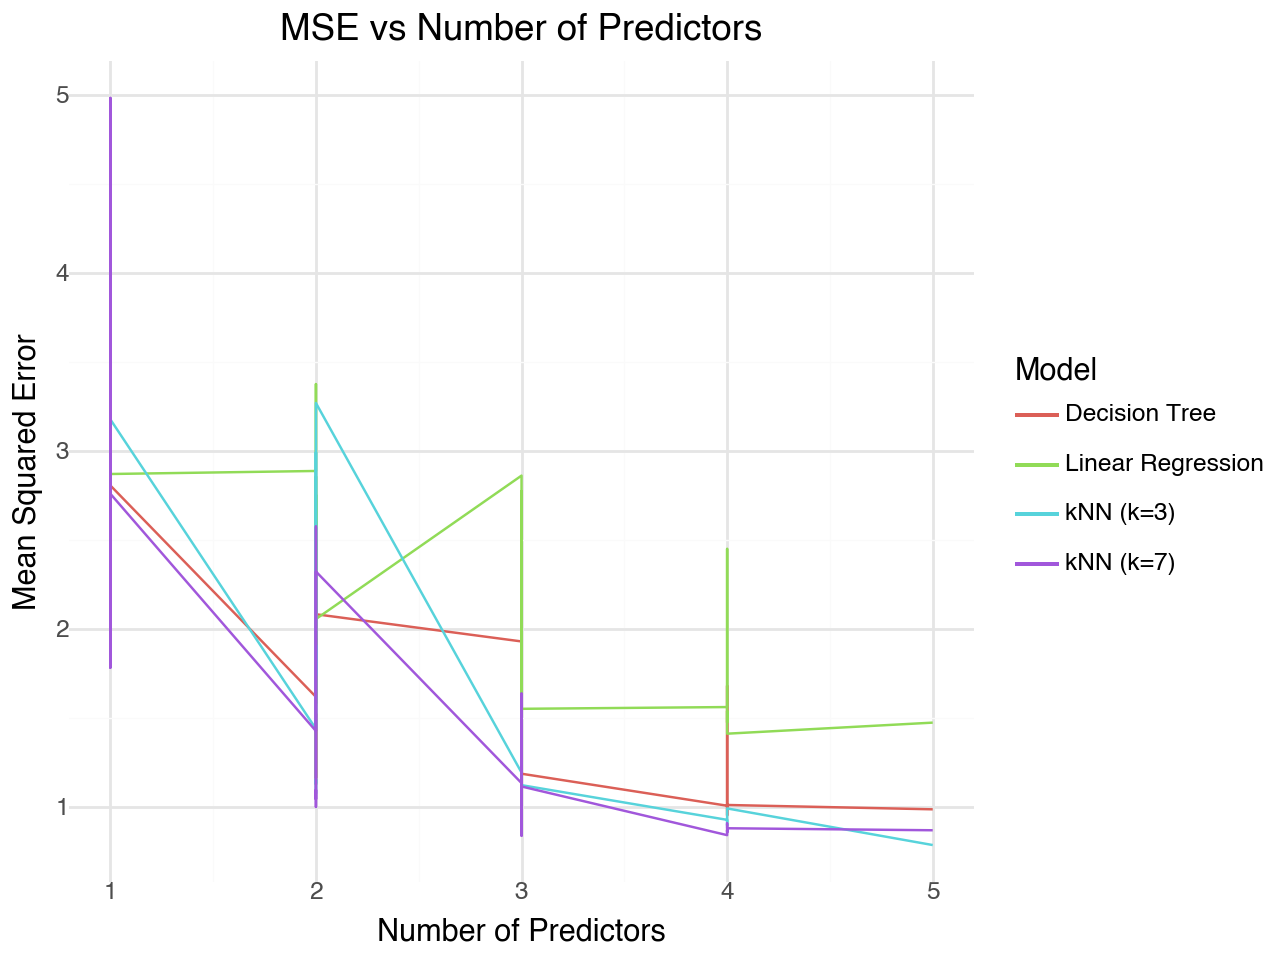

In [2]:

# Define predictors (combine numeric and categorical feature names)
all_features = numeric_features + categorical_features

# Iterate over subsets of predictors
for k in range(1, len(all_features) + 1):
    for predictors in combinations(all_features, k):
        # Select the subset of predictors
        selected_features = list(predictors)
        
        # Adjust preprocessor for selected predictors
        selected_numeric = [f for f in selected_features if f in numeric_features]
        selected_categorical = [f for f in selected_features if f in categorical_features]
        
        subset_preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), selected_numeric),
                ('cat', OneHotEncoder(), selected_categorical)
            ]
        )
        
        for model_name, model in models.items():
            # Create pipeline
            clf = Pipeline(steps=[('preprocessor', subset_preprocessor), ('model', model)])
            
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
                X[selected_features], y, test_size=0.3, random_state=42
            )
            
            # Fit model
            clf.fit(X_train, y_train)
            
            # Predict and calculate MSE
            y_pred = clf.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            
            # Store results
            results.append({
                'Model': model_name,
                'Predictors': len(selected_features),
                'MSE': mse
            })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Plot MSE vs. Number of Predictors using plotnine
mse_plot = (
    ggplot(results_df, aes(x='Predictors', y='MSE', color='Model')) +
    geom_line() +
    labs(
        title='MSE vs Number of Predictors',
        x='Number of Predictors',
        y='Mean Squared Error'
    ) +
    theme_minimal()
)

print(mse_plot)

# Find the best model
best_model = results_df.loc[results_df['MSE'].idxmin()]
print("Best Model:", best_model)
